In [148]:
import pandas as pd

df = pd.read_csv("logs.csv.gz", compression="gzip", parse_dates=[1])

In [149]:
df.dtypes

ogpweb#               int64
date         datetime64[ns]
request              object
code                  int64
bytes                 int64
referrer             object
useragent            object
source               object
rt                  float64
urt                 float64
dtype: object

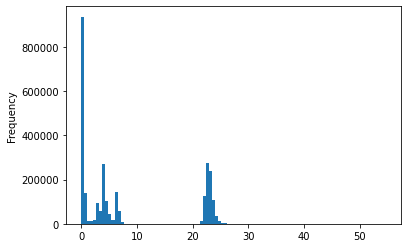

In [184]:
ax = df['urt'].plot.hist(bins=100)

In [186]:
def bucket(r):
    r = r.rsplit('HTTP/')[0].split('GET ')[-1]
    for s in ('?', '/dataset/', '/reference/', '/inventory/',
              '/comment/', '/node/', '/suggested-datasets/',
              '/4plan/', '/apps/'):
        if s in r:
            r = r.split(s)[0] + s + '…'
    return r
bdf = df[['request','urt']].copy(deep=True)
bdf['request'] = bdf['request'].map(bucket)

In [155]:
4 * 8 * 2 * 7

448

In [190]:
sdf = bdf.groupby(['request']).agg(['median','count','sum'])
sdf.columns = sdf.columns.map('_'.join)
sdf['urt_sum'] = sdf['urt_sum'] / (60*60*24)  # days

busy = sdf[(sdf['urt_count'] > 10) & (sdf['urt_sum'] > 0.02)]
busy.sort_values('urt_sum', ascending=False).rename(
    columns={'urt_sum':'urt_sum (days)'})

,urt_median,urt_count,urt_sum (days)
request,,,
/fr/search/travelq?…,22.7220,1028923,233.496984
/en/search/contracts?…,4.0300,136004,6.528421
/en/search/travelq?…,4.3240,102373,5.248754
/en/search/hospitalityq?…,4.0450,91415,4.430040
/en/search/ati?…,3.1460,114572,4.187813
/en/search/reclassification?…,4.2070,79139,3.850433
/data/en/dataset?…,0.4190,450957,2.375996
/fr/search/contrats?…,5.3910,15266,0.979683
/fr/search/hospitalityq?…,4.9610,15637,0.912061


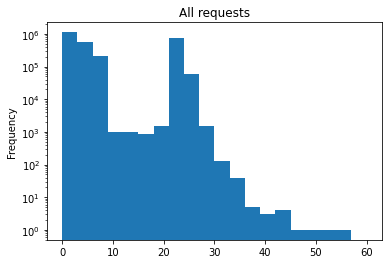

In [196]:
ax = df['urt'].plot.hist(
    bins=20, log=True, range=[0,60], title="All requests")

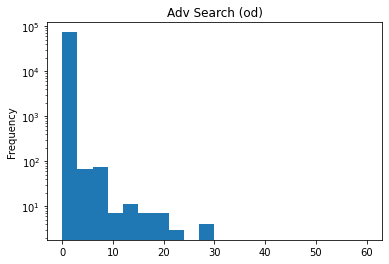

In [197]:
ax = df[df['request'].str.contains('/od/')]['urt'].plot.hist(
    bins=20, log=True, range=[0,60], title="Adv Search (od)")

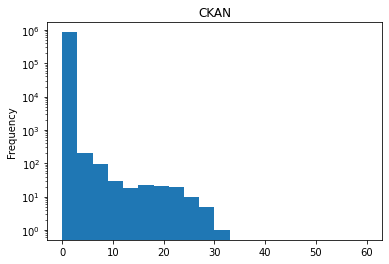

In [199]:
ax = df[df['request'].str.contains(' /data/')]['urt'].plot.hist(
    bins=20, log=True, range=[0,60], title="CKAN")

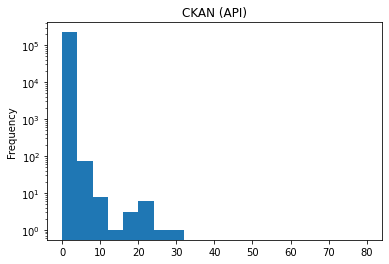

In [200]:
ax = df[df['request'].str.contains('/action/')]['urt'].plot.hist(
    bins=20, log=True, range=[0,80], title="CKAN (API)")

In [177]:
def action(r):
    return r.rsplit('/action/')[-1].rsplit(' HTTP/')[0].rsplit('?')[0]
cadf = df[df['request'].str.contains('/action/')][
    ['request','urt']].copy(deep=True)
cadf['request'] = cadf['request'].map(action)

In [201]:
scadf = cadf.groupby(['request']).agg(['median','count','sum'])
scadf.columns = scadf.columns.map('_'.join)
scadf['urt_sum'] = scadf['urt_sum'] / 60  # minutes
scadf.sort_values('urt_sum', ascending=False).rename(
    columns={'urt_sum':'urt_sum (minutes)'})

,urt_median,urt_count,urt_sum (minutes)
request,,,
package_show,0.0370,220655,154.206817
package_update,1.9355,716,24.455150
package_search,0.3450,2501,23.927400
organization_list,6.2510,29,3.037117
package_create,5.3930,5,0.447067
package_list,1.4200,7,0.170833
recently_changed_packages_activity_list,0.1465,20,0.050267
help_show,0.0160,5,0.001317
